In [22]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Plotting parameters
# rc('text', usetex=False)
small_size = 15
medium_size = 25
bigger_size = 30
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title
plt.rc('text', usetex = False)

# Computation time

- Notebook for running JAX-CanVeg on US-Bi1: `./US-Bi1/calculate_execution_time.ipynb`
- Notebook for running JAX-CanVeg on US-Hn1: `./US-Hn1/calculate_execution_time.ipynb`


In [26]:
usbi1_time = {
    'Matlab': 1144.13, 
    'JAX-CPU': 60.,
    'JAX-GPU': 2.15 
}

ushn1_time = {
    'Matlab': 751.67, 
    'JAX-CPU': 49.7,
    'JAX-GPU': 1.96 
}

usme2_time = {
    'Matlab': 2846.56, 
    # 'JAX-CPU': 49.7,
    # 'JAX-GPU': 1.96 
}

# uswhs_time = {
#     'Matlab': 2846.56, 
#     'JAX-CPU': 49.7,
#     'JAX-GPU': 1.96 
# }


In [27]:
compute_time = pd.DataFrame(
    [usbi1_time, ushn1_time]
)
compute_time.index = ['US-Bi1', 'US-Hn1']


In [28]:
compute_time

,Matlab,JAX-CPU,JAX-GPU
US-Bi1,1144.13,60.0,2.15
US-Hn1,751.67,49.7,1.96


In [40]:
# compute_time.melt(ignore_index=False)
compute_time_df = pd.melt(compute_time.reset_index(), id_vars='index',value_vars=['Matlab','JAX-CPU', 'JAX-GPU'])
compute_time_df.rename(columns={"index": "Site", "variable": "Model", "value":"Time"}, inplace=True)

# Plot

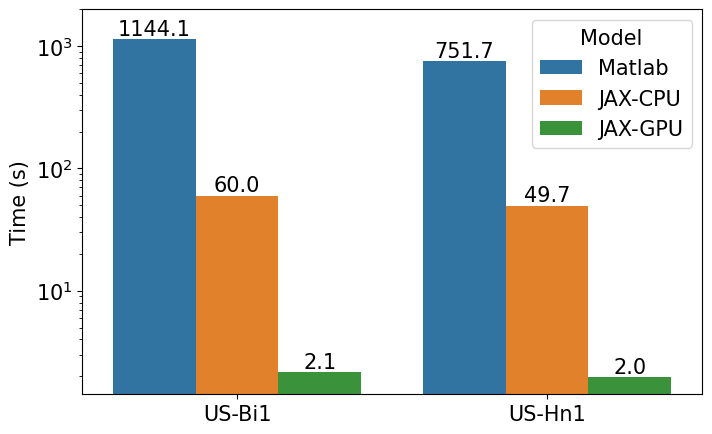

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
sns.barplot(compute_time_df, x="Site", y="Time", hue="Model", ax=ax)
ax.set(yscale='log', ylabel='Time (s)', xlabel='', ylim=[None, 2000]);
for i in ax.containers:
    ax.bar_label(i,fmt='%.1f')
    